In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('data/data-1729656846556.csv')

# Display the first few rows of the data
data.head()


,job_no,job_date,job_type,job_status,property_id,room_level,room_name,line_id,alarm_required,alarm_brand,...,alarm_status,alarm_action,alarm_reason,expiry_year,expiry_month,image_id,image_name,image_type,image_status,decline_reason
0,799844,2024-06-28,Lease Service,Compliant,144255,GF/Entrance,Bedroom 1,1879946,RFC,Voltex,...,Compliant,Replace (New Alarm),Faulty,2034.0,6.0,2365310,741243435-smokealarm-bedroom-1.jpg,Images,Approved,NaN
1,799844,2024-06-28,Lease Service,Compliant,144255,GF/Entrance,Bedroom 1,1879946,RFC,Voltex,...,Compliant,Replace (New Alarm),Faulty,2034.0,6.0,2365311,741243492-smokealarm-bedroom-1.jpg,ExpiryImages,Approved,NaN
2,799844,2024-06-28,Lease Service,Compliant,144255,GF/Entrance,Bedroom 1,1879946,RFC,Voltex,...,Compliant,Replace (New Alarm),Faulty,2034.0,6.0,2365312,741243498-smokealarm-bedroom-1.jpg,ExpiryImages,Approved,NaN
3,799844,2024-06-28,Lease Service,Compliant,144255,GF/Entrance,Bedroom 2,1879947,RFC,Voltex,...,Compliant,Serviced Alarm,NaN,2032.0,6.0,2365313,741243538-smokealarm-bedroom-2.jpg,Images,Approved,NaN
4,799844,2024-06-28,Lease Service,Compliant,144255,GF/Entrance,Bedroom 2,1879947,RFC,Voltex,...,Compliant,Serviced Alarm,NaN,2032.0,6.0,2365314,741243556-smokealarm-bedroom-2.jpg,ExpiryImages,Approved,NaN


#지금당장은 이 칼럼들만 살리고, 주석처리한 칼럼은 나중에 더 개량할때.
job_no image_name image_type image_status decline_reason
<!-- alarm_required alarm_brand   alarm_grade alarm_interconnected alarm_power alarm_type alarm_status	alarm_action	alarm_reason	
expiry_year	expiry_month	 -->

In [13]:
# Keep only the specified columns
data = data[['job_no', 'image_name', 'image_type', 'image_status', 'decline_reason']]

# Display the first few rows of the updated DataFrame
print(data.head())

   job_no                          image_name    image_type image_status  \
0  799844  741243435-smokealarm-bedroom-1.jpg        Images     Approved   
1  799844  741243492-smokealarm-bedroom-1.jpg  ExpiryImages     Approved   
2  799844  741243498-smokealarm-bedroom-1.jpg  ExpiryImages     Approved   
3  799844  741243538-smokealarm-bedroom-2.jpg        Images     Approved   
4  799844  741243556-smokealarm-bedroom-2.jpg  ExpiryImages     Approved   

  decline_reason  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [21]:
print(data.dtypes)

job_no             int64
image_name        object
image_type        object
image_status      object
decline_reason    object
dtype: object


In [15]:
print("--Initial shape of data:", data.shape)
print("Missing values per column:\n", data.isnull().sum())
print("--Shape of data after dropping missing values:", data.shape)

--Initial shape of data: (12306, 5)
Missing values per column:
 job_no                0
image_name            0
image_type            0
image_status          0
decline_reason    10792
dtype: int64
--Shape of data after dropping missing values: (12306, 5)


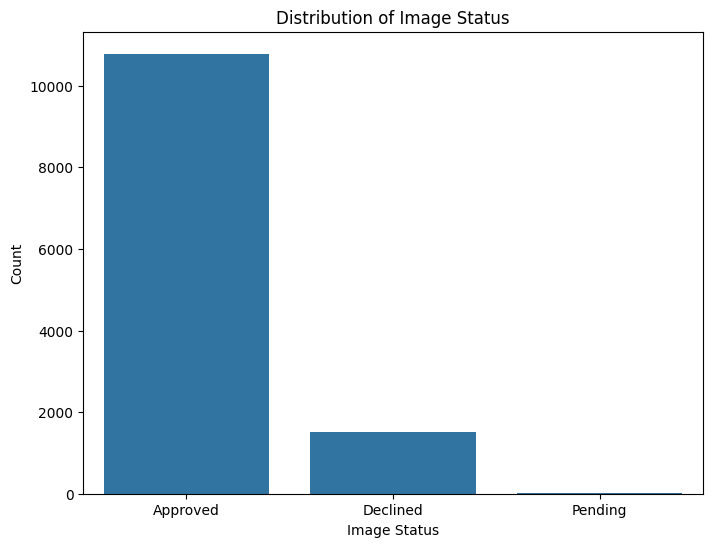

In [17]:
status_counts = data['image_status'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Image Status')
plt.xlabel('Image Status')
plt.ylabel('Count')
plt.show()


In [19]:
print(data['image_status'].value_counts())
# Remove rows where image_status is 'pending'
data = data[data['image_status'] != 'Pending']

# Verify the result
print(data['image_status'].value_counts())

image_status
Approved    10786
Declined     1504
Pending        16
Name: count, dtype: int64
image_status
Approved    10786
Declined     1504
Name: count, dtype: int64


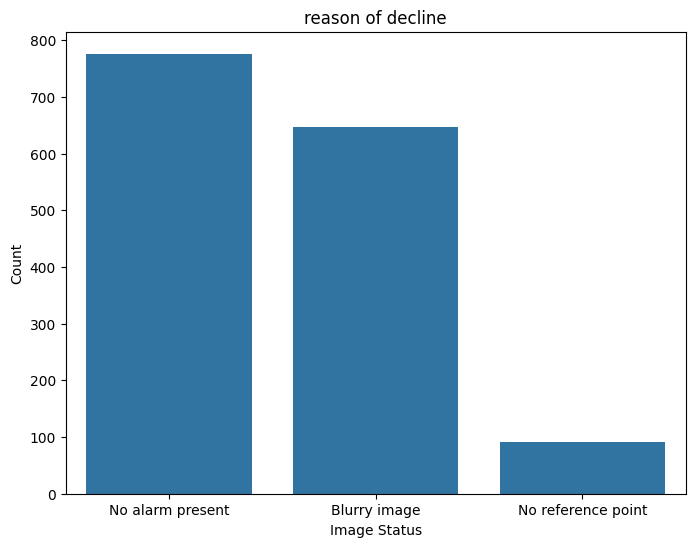

In [25]:
status_counts2 = data['decline_reason'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts2.index, y=status_counts2.values)
plt.title('reason of decline')
plt.xlabel('Image Status')
plt.ylabel('Count')
plt.show()


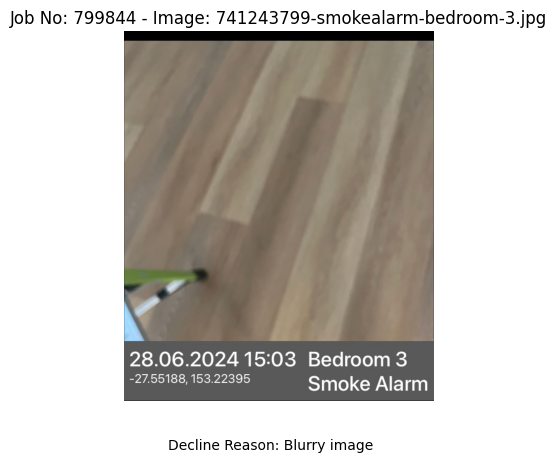

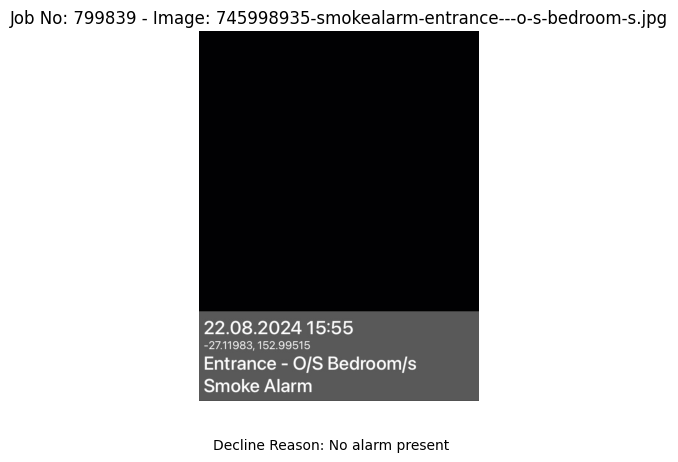

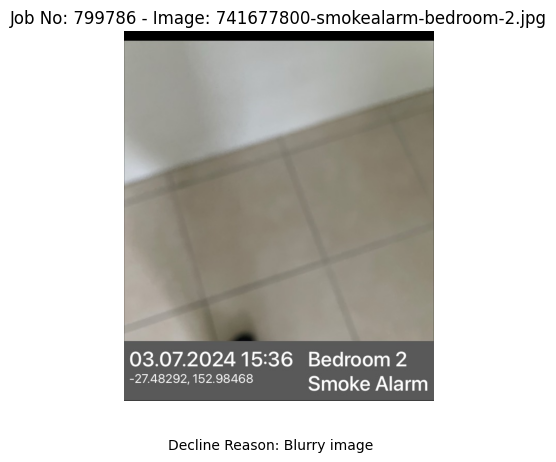

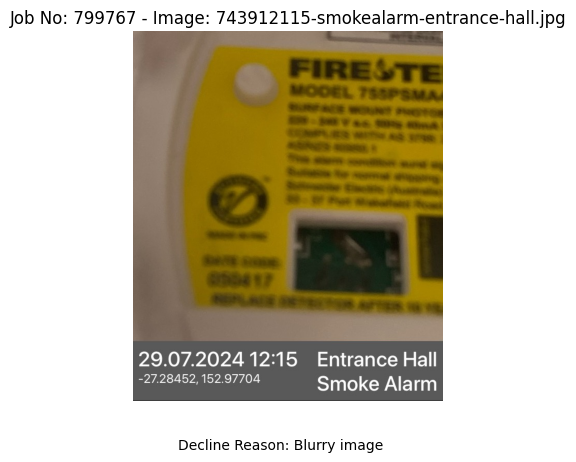

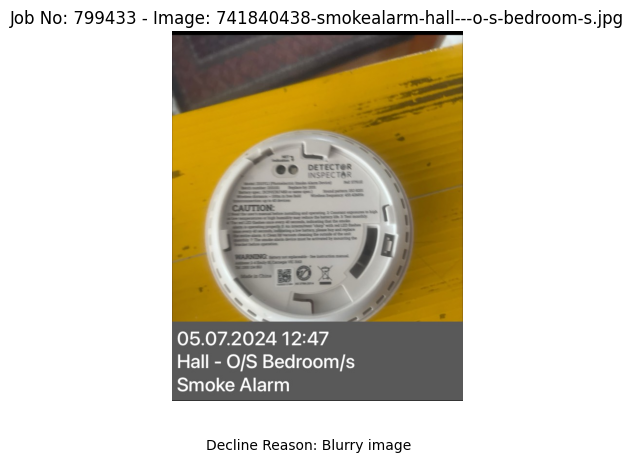

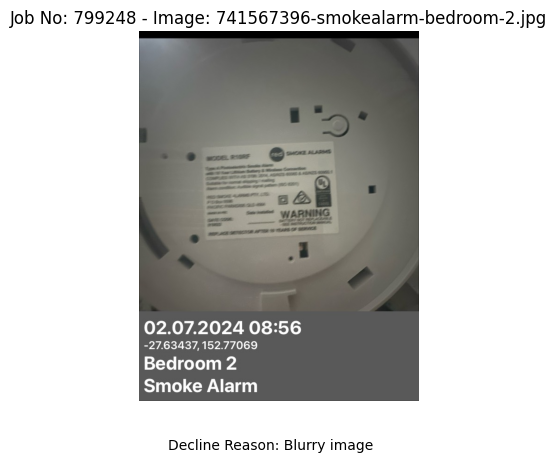

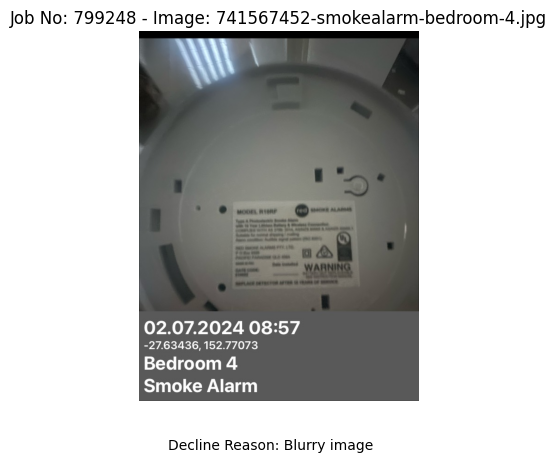

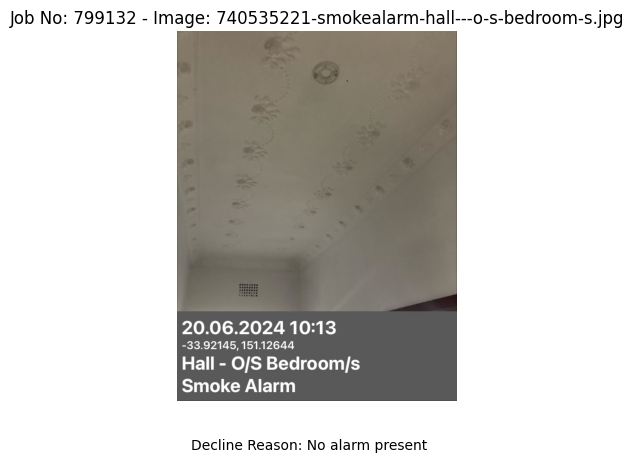

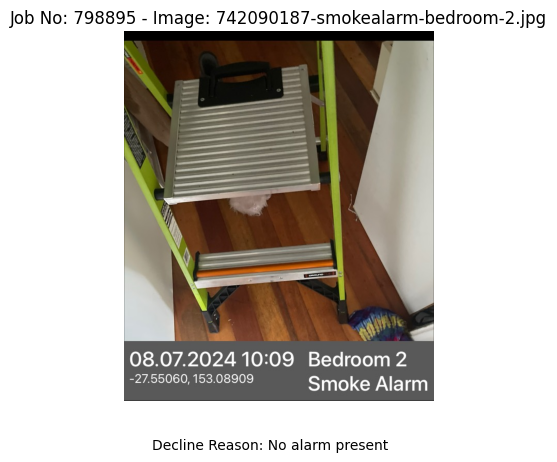

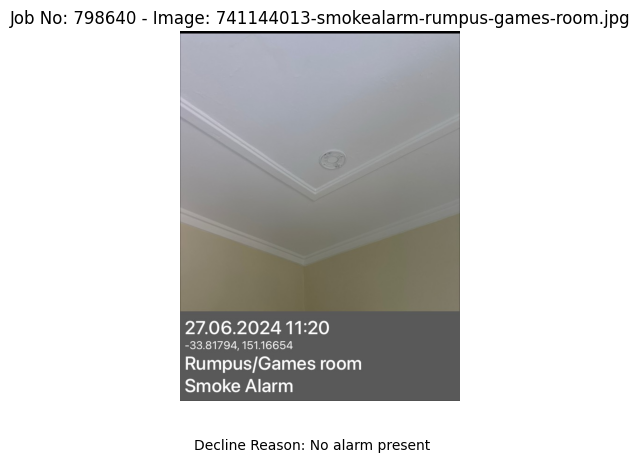

In [30]:
import os
from PIL import Image

# Define the base directory for declined images
base_dir = 'data/declined/compliances'

# Filter DataFrame to get the first 10 declined images
declined_images = data[(data['image_status'] == 'Declined')].head(10)

# Loop through each declined image
for index, row in declined_images.iterrows():
    job_no = str(row['job_no'])
    image_name = row['image_name']
    decline_reason = row['decline_reason']
    
    # Construct the full path to the image
    image_path = os.path.join(base_dir, job_no, image_name)
    
    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f'Job No: {job_no} - Image: {image_name}')
        plt.axis('off')  # Hide axes for a cleaner look
        plt.figtext(0.5, 0.01, f"Decline Reason: {decline_reason}", ha="center", fontsize=10, wrap=True)
        plt.show()
    else:
        print(f"Image not found: {image_path}")

